# 绘制超过浮点数范围的对数轴

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
import sympy
import numpy as np

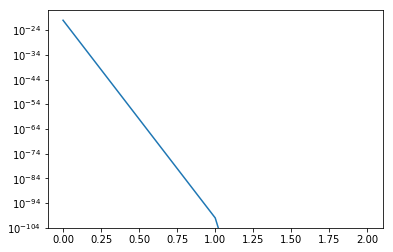

In [8]:
plt.plot([0, 1, 2], [sympy.Float('1e-20'), sympy.Float('1e-100'), sympy.Float('1e-700')])
plt.yscale('log')

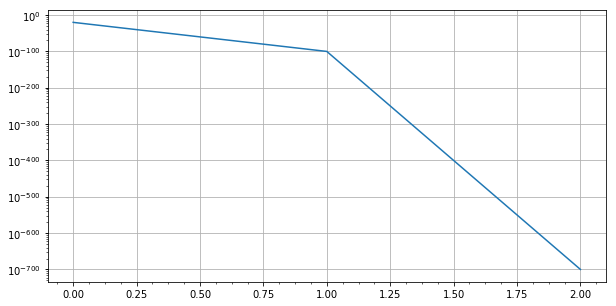

In [9]:

from matplotlib.ticker import FuncFormatter, Locator
x = [0, 1, 2]
y = [sympy.Float('1e-20'), sympy.Float('1e-100'), sympy.Float('1e-700')]

def log_formatter(x, pos):
    return "$10^{{{:d}}}$".format(int(x))

class LogMinorLocator(Locator):
    def __call__(self):
        majorlocs = self.axis.get_majorticklocs()
        step = majorlocs[1] - majorlocs[0]
        res = majorlocs[:, None] + np.log10(np.linspace(1, 0.1, 10)) * step
        return res.ravel()

formatter = FuncFormatter(log_formatter)

fig, ax = plt.subplots(figsize=(10, 5))
y2 = list(map(lambda x:sympy.log(x, 10), y))
ax.plot(x, y2)
ax.minorticks_on()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(LogMinorLocator())
ax.grid();